In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_column_names():
    with open('trainset_python\\python\\class_names.txt') as f:
        column_names = [line.strip().split(': ')[1] for line in f]
    return column_names

column_names = load_column_names()
print(column_names)

['other', 'comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']


In [20]:
def load_dataset():
    features = np.zeros((0, 100, 548))
    labels = np.zeros((0, 100))
    
    for subdir, dirs, files in os.walk("trainset_python\\python"):
        for file in files:
            if file.endswith('labels.npy'):
                file_path = os.path.join(subdir, file)
                labels = np.append(labels, np.load(file_path)[:, 0].reshape(1, 100), axis=0)
                
            if not file.endswith('labels.npy') and file.endswith('.npy'):
                file_path = os.path.join(subdir, file)
                samples = np.load(file_path)
                samples = samples.reshape(1, samples.shape[0], samples.shape[1])
                features = np.append(features, samples, axis=0)
    
    labels = np.round(labels, decimals=0)
    
    return features, labels

In [22]:
dataset, labels = load_dataset()
print(labels.shape, dataset.shape)

(1200, 100) (1200, 100, 548)


In [75]:
unique, counts = np.unique(labels, return_counts=True)
sum_counts = np.sum(counts)
percentages = counts / sum_counts * 100

sum_counts_without_other = np.sum(counts[1:])
percentages_without_other = counts[1:] / sum_counts_without_other * 100

df_counts = pd.DataFrame(data={"Counts": counts, "Percentages": percentages})
df_counts = df_counts.rename(index=dict(zip(df_counts.index, column_names)))

df_counts_without_other = pd.DataFrame(data={"Counts": counts[1:], "Percentages": percentages_without_other})
df_counts_without_other = df_counts_without_other.rename(index=dict(zip(df_counts_without_other.index, column_names[1:])))

In [76]:
df_counts

,Counts,Percentages
other,85358,71.131667
comcuc,5833,4.860833
cowpig1,8954,7.461667
eucdov,8198,6.831667
eueowl1,2324,1.936667
grswoo,5111,4.259167
tawowl1,4222,3.518333


In [77]:
df_counts_without_other

,Counts,Percentages
comcuc,5833,16.837942
cowpig1,8954,25.847237
eucdov,8198,23.664915
eueowl1,2324,6.708620
grswoo,5111,14.753767
tawowl1,4222,12.187518


In [24]:
print(unique)

[0. 1. 2. 3. 4. 5. 6.]


In [96]:
print(25.847237 - 6.708620)

19.138617


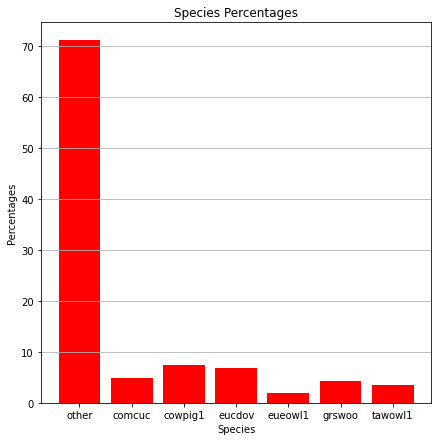

In [71]:
plt.figure(figsize=(7,7))
plt.title('Species Percentages')
plt.bar(column_names, df_counts['Percentages'], label='Percentages', color=(1, 0, 0))
plt.xlabel('Species')
plt.ylabel('Percentages')
plt.grid(axis='y')
plt.show()

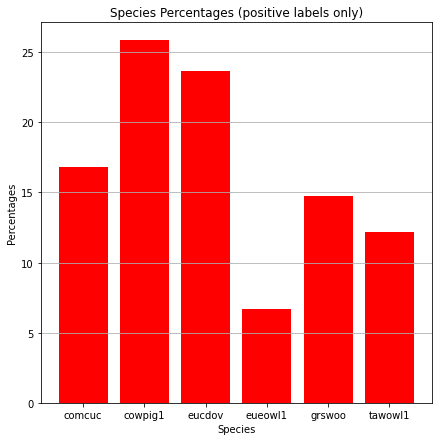

In [95]:
plt.figure(figsize=(7,7))
plt.title('Species Percentages (positive labels only)')
plt.bar(column_names[1:], df_counts_without_other['Percentages'], label='Percentages', color=(1, 0, 0))
plt.xlabel('Species')
plt.ylabel('Percentages')
plt.grid(axis='y')
plt.show()

In [84]:
def get_annotator_agreement():
    annotator_agreement = dict()
    
    for directory in next(os.walk("trainset_python//python"))[1]:
        annotator_agreement[directory] = 0
        file_count = 0

        for file in next(os.walk("trainset_python//python//" + directory))[2]:
            if 'labels' in file:
                file_count += 1
                labels = np.load("trainset_python//python//" + directory + '//' + file)

                num_annotators = labels.shape[1] - 1
                annotator_agreement_file = 0
                for i in range(labels.shape[0]):
                    annotator_agreement_file += np.count_nonzero(labels[i][1:] == labels[i][0]) / num_annotators
                
                annotator_agreement[directory] += annotator_agreement_file / labels.shape[0]

        annotator_agreement[directory] = annotator_agreement[directory] / file_count * 100
    
    return annotator_agreement

annotator_agreement = get_annotator_agreement()
print(annotator_agreement)

{'comcuc': 92.64454761904761, 'cowpig1': 91.92009523809521, 'eucdov': 91.83809523809515, 'eueowl1': 96.34680952380953, 'grswoo': 89.3409047619048, 'tawowl1': 92.90773809523806}


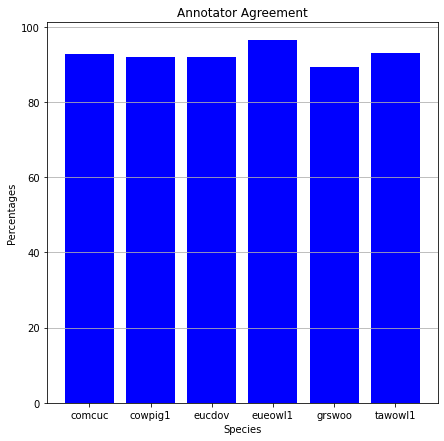

In [85]:
plt.figure(figsize=(7,7))
plt.title('Annotator Agreement')
plt.bar(annotator_agreement.keys(), annotator_agreement.values(), color='b')
plt.xlabel('Species')
plt.ylabel('Percentages')
plt.grid(axis='y')
plt.show()

In [92]:
def get_annotator_agreement_only_positive_labels():
    annotator_agreement = dict()
    
    for directory in next(os.walk("trainset_python//python"))[1]:
        annotator_agreement[directory] = 0
        file_count = 0

        for file in next(os.walk("trainset_python//python//" + directory))[2]:
            if 'labels' in file:
                file_count += 1
                labels = np.load("trainset_python//python//" + directory + '//' + file)

                num_annotators = labels.shape[1] - 1
                annotator_agreement_file = 0
                num_labels = 0
                for i in range(labels.shape[0]):
                    if labels[i, 0] != 0:
                        num_labels += 1
                        annotator_agreement_file += np.count_nonzero(labels[i][1:] == labels[i][0]) / num_annotators
                
                if num_labels != 0:
                    annotator_agreement[directory] += annotator_agreement_file / num_labels

        annotator_agreement[directory] = annotator_agreement[directory] / file_count * 100
    
    return annotator_agreement

annotator_agreement_only_positive_labels = get_annotator_agreement_only_positive_labels()
print(annotator_agreement_only_positive_labels)

{'comcuc': 88.67057807893659, 'cowpig1': 84.25188635794514, 'eucdov': 86.28315064175202, 'eueowl1': 85.55182866759776, 'grswoo': 83.14907848173085, 'tawowl1': 83.27750461741529}


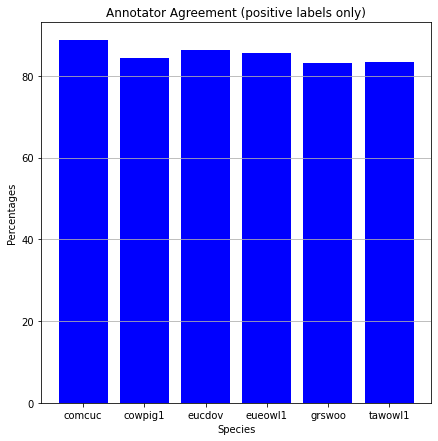

In [94]:
plt.figure(figsize=(7,7))
plt.title('Annotator Agreement (positive labels only)')
plt.bar(annotator_agreement_only_positive_labels.keys(), annotator_agreement_only_positive_labels.values(), color='b')
plt.xlabel('Species')
plt.ylabel('Percentages')
plt.grid(axis='y')
plt.show()

In [67]:
def convert_time_steps_to_ms(num_steps):
    return num_steps * 0.2

In [99]:
def get_call_durations():
    durations = dict()
    for column in column_names:
        if column != column_names[0]:
            durations[column] = []
    
    durations["all"] = []
    
    for i in range(labels.shape[0]):
        consecutive_steps = 1
        current_label = labels[i, 0]
        
        for j in range(1, labels.shape[1]):
            if labels[i, j] != current_label:
                column = column_names[int(current_label)]
                duration = convert_time_steps_to_ms(consecutive_steps)
                if column != column_names[0]:
                    durations[column].append(duration)
                    durations["all"].append(duration)
                consecutive_steps = 0
                current_label = labels[i, j]
                
            consecutive_steps += 1
    
    for column in durations.keys():
        durations[column] = np.array(durations[column])
        
    return durations
            
            
call_durations = get_call_durations()

In [125]:
means = []
medians = []
q3s = []
q1s = []
interquartile_ranges = []
mins = []
maxs = []
stds = []

for column in call_durations.keys():
    means.append(np.mean(call_durations[column]))
    medians.append(np.median(call_durations[column]))
    q1 = np.percentile(call_durations[column], 25)
    q1s.append(q1)
    q3 = np.percentile(call_durations[column], 75)
    q3s.append(q3)
    interquartile_ranges.append(q3 - q1)
    maxs.append(np.max(call_durations[column]))
    mins.append(np.min(call_durations[column]))
    stds.append(np.std(call_durations[column]))
    
df_durations = pd.DataFrame(data={"Mean": means, "Median": medians, "Q1": q1s, "Q3": q3s, "Interquartile Range": interquartile_ranges, "Min": mins,
                                 "Max": maxs, "Std": stds})
df_durations = df_durations.rename(index=dict(zip(df_durations.index, call_durations.keys())))
df_durations

,Mean,Median,Q1,Q3,Interquartile Range,Min,Max,Std
comcuc,0.696509,0.6,0.6,0.8,0.2,0.2,2.6,0.202601
cowpig1,1.541209,1.0,0.6,1.6,1.0,0.2,18.2,2.002353
eucdov,1.091828,1.2,0.8,1.4,0.6,0.2,11.2,0.738880
eueowl1,0.693740,0.6,0.4,0.8,0.4,0.2,6.6,0.541477
grswoo,0.469332,0.4,0.2,0.4,0.2,0.2,17.6,0.752063
tawowl1,0.801957,0.6,0.4,1.0,0.6,0.2,5.4,0.582655
all,0.849353,0.6,0.4,1.0,0.6,0.2,18.2,1.000115


C:\Users\thoma\AppData\Local\Temp/ipykernel_17304/2570634029.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(call_durations.keys(), rotation=45, fontsize=20)


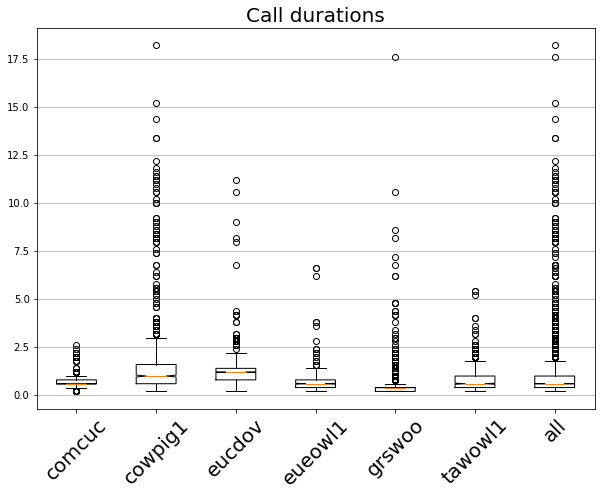

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_xticklabels(call_durations.keys(), rotation=45, fontsize=20)
ax.set_title("Call durations", fontsize=20)
ax.boxplot(call_durations.values(), call_durations.keys())
ax.grid(axis='y')
plt.show()